## Подключаем библиотеки

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import missingno as msno
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Normalise_df.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [15]:
df.head()

,ID,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Делим данные на тестовые и тренировочные

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['Area','No. of Bedrooms',
'New/Resale',
'Gymnasium',
'Lift Available',
'Car Parking',
'Maintenance Staff',
'24x7 Security',
"Children's Play Area",
'Clubhouse',
'Intercom',
'Landscaped Gardens',
'Indoor Games',
'Gas Connection',
'Jogging Track',
'Swimming Pool']].to_numpy(), df.Price.to_numpy(), train_size = 0.7)

## Обучаем модель

In [6]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5569465248128312

## Коэффициет детерминации больше 0,5 что явялется приемлемым

In [7]:
y_pred = reg.predict(X_test)

In [8]:
mean_squared_error(y_test, y_pred, squared=False) # MSE

13210486.084637878

In [9]:
reg.score(X_test, y_pred)

1.0

In [10]:
result_df = pd.DataFrame.from_records(data=[list(y_test), list(y_pred)]).transpose()

In [11]:
result_df.rename(columns = {0:'y_test', 1:'y_pred'}, inplace = True)

In [12]:
result_df['ID'] = result_df.index

In [13]:
result_df.head()

,y_test,y_pred,ID
0,4850000.0,2.239072e+06,0
1,9499000.0,3.248569e+06,1
2,18800000.0,3.149041e+07,2
3,42500000.0,1.986713e+07,3
4,11000000.0,3.823552e+06,4


Text(0.5, 1.0, 'Test-Predict Compare')

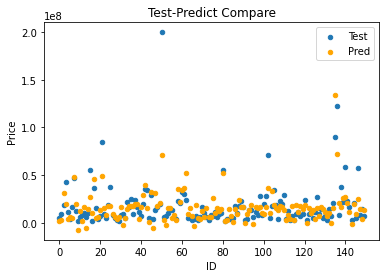

In [16]:
result_df = result_df.head(150)
ax = result_df.plot(kind = 'scatter', x = 'ID', y = 'y_test', label = "Test")
result_df.plot(kind = 'scatter', x = 'ID', y = 'y_pred', label = "Pred", c = 'orange', ax = ax)
plt.ylabel('Price')
plt.title('Test-Predict Compare')